<a href="https://colab.research.google.com/github/Jack-Morgan22/BigData/blob/main/BigData_(Reformatted).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Data Analysis Libraries
import numpy as np
import pandas as pd

#Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

#Google Colab Import Files
from google.colab import files
import io

In [2]:
uploaded = files.upload()

Saving nomis_2024_03_04_132215.csv to nomis_2024_03_04_132215.csv
Saving NS-SEC_2021.csv to NS-SEC_2021.csv
Saving table-1-2020-21.csv to table-1-2020-21.csv


In [3]:
GradData = pd.read_csv('table-1-2020-21.csv')
AreaQuali = pd.read_csv('nomis_2024_03_04_132215.csv')
SERank = pd.read_csv('NS-SEC_2021.csv')

In [4]:
print(GradData.columns)
print(AreaQuali.columns)
print(SERank.columns)

Index(['UKPRN', 'Provider name', 'Country of provider', 'Domicile',
       'Level of qualification obtained', 'Mode of former study',
       'Interim study', 'Sex', 'Activity', 'Academic year', 'Number'],
      dtype='object')
Index(['2022 local authorities: county', 'No qualifications',
       'Level 1 and entry level qualifications', 'Level 2 qualifications',
       'Apprenticeship', 'Level 3 qualifications',
       'Level 4 qualifications or above', 'Other qualifications', 'Unnamed: 8',
       'Unnamed: 9'],
      dtype='object')
Index(['ONSConstID', 'ConstituencyName', 'RegNationID', 'RegNationName',
       'NatComparator', 'variables', 'groups', 'Con_num', 'Con_pc', 'RN_pc',
       'Nat_pc', 'ranking_total', 'rank'],
      dtype='object')


In [5]:
AreaQuali = AreaQuali.drop(['Unnamed: 8'], axis = 1)
AreaQuali = AreaQuali.drop(['Unnamed: 9'], axis = 1)

In [6]:
GradData.astype('string')
AreaQuali.astype('string')
SERank.astype('string')

,ONSConstID,ConstituencyName,RegNationID,RegNationName,NatComparator,variables,groups,Con_num,Con_pc,RN_pc,Nat_pc,ranking_total,rank
0,E14000530,Aldershot,E12000008,South East,England & Wales,"Higher managerial, administrative and professi...","Managerial, administrative and professional oc...",11636,0.128601585,0.156598249,0.130829164,0.337407854,253
1,E14000530,Aldershot,E12000008,South East,England & Wales,"Lower managerial, administrative and professio...","Managerial, administrative and professional oc...",18893,0.208806269,0.21894599,0.199105089,0.337407854,253
2,E14000530,Aldershot,E12000008,South East,England & Wales,Intermediate occupations,Intermediate occupations,12310,0.136050663,0.12072372,0.114305777,0.230379859,245
3,E14000530,Aldershot,E12000008,South East,England & Wales,Small employers and own account workers,Intermediate occupations,8535,0.094329196,0.116141864,0.105660639,0.230379859,245
4,E14000530,Aldershot,E12000008,South East,England & Wales,Lower supervisory and technical occupations,Routine and manual occupations,5617,0.062079332,0.050807854,0.053959228,0.303069153,254
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5152,W07000080,Cardiff South and Penarth,W92000004,Wales,England & Wales,Lower supervisory and technical occupations,Routine and manual occupations,4491,0.049199185,0.062463859,0.053959228,0.278225718,331
5153,W07000080,Cardiff South and Penarth,W92000004,Wales,England & Wales,Semi-routine occupations,Routine and manual occupations,10761,0.117887426,0.130942371,0.11363243,0.278225718,331
5154,W07000080,Cardiff South and Penarth,W92000004,Wales,England & Wales,Routine occupations,Routine and manual occupations,10145,0.111139107,0.131938692,0.120658815,0.278225718,331
5155,W07000080,Cardiff South and Penarth,W92000004,Wales,England & Wales,Never worked / long-term unemployed,Never worked / long-term unemployed,9744,0.106746127,0.085361661,0.08511976,0.106746127,126


In [7]:
AreaQuali['No qualifications'].astype('int')
AreaQuali['Level 1 and entry level qualifications'].astype('int')
AreaQuali['Level 2 qualifications'].astype('int')
AreaQuali['Apprenticeship'].astype('int')
AreaQuali['Level 3 qualifications'].astype('int')
AreaQuali['Level 4 qualifications or above'].astype('int')
AreaQuali['Other qualifications'].astype('int')

0       789
1      3199
2       602
3      1034
4      1906
       ... 
169    1412
170     586
171     735
172     584
173    1597
Name: Other qualifications, Length: 174, dtype: int64

In [8]:
SERank['rank'].astype('int')
SERank['ranking_total'].astype('float')

0       0.337408
1       0.337408
2       0.230380
3       0.230380
4       0.303069
          ...   
5152    0.278226
5153    0.278226
5154    0.278226
5155    0.106746
5156    0.092428
Name: ranking_total, Length: 5157, dtype: float64

In [9]:
GradData.describe(include = "all")

,UKPRN,Provider name,Country of provider,Domicile,Level of qualification obtained,Mode of former study,Interim study,Sex,Activity,Academic year,Number
count,1.048561e+06,1048561,1048561,1048561,1048561,1048561,1048561,1048561,1048561,1048561,1.048561e+06
unique,NaN,340,5,4,3,3,2,4,13,1,NaN
top,NaN,The Open University,All,All,All,All,Include significant interim study,All,Full-time employment,2020/21,NaN
freq,NaN,6656,522880,409663,405997,394115,524862,329004,80659,1048561,NaN
mean,1.000964e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.053909e+01
std,1.331511e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.189053e+02
min,1.000006e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,1.000386e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
50%,1.000714e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
75%,1.000782e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+01


In [10]:
GradData.head()

,UKPRN,Provider name,Country of provider,Domicile,Level of qualification obtained,Mode of former study,Interim study,Sex,Activity,Academic year,Number
0,10008071,AA School of Architecture,England,Non-UK,All,Full-time,Exclude significant interim study,Female,Full-time employment,2020/21,35
1,10008071,AA School of Architecture,England,Non-UK,All,Full-time,Exclude significant interim study,Female,Part-time employment,2020/21,0
2,10008071,AA School of Architecture,England,Non-UK,All,Full-time,Exclude significant interim study,Female,Unknown pattern of employment,2020/21,0
3,10008071,AA School of Architecture,England,Non-UK,All,Full-time,Exclude significant interim study,Female,Voluntary or unpaid work,2020/21,0
4,10008071,AA School of Architecture,England,Non-UK,All,Full-time,Exclude significant interim study,Female,Employment and further study,2020/21,5


In [11]:
AreaQuali.describe(include = "all")

,2022 local authorities: county,No qualifications,Level 1 and entry level qualifications,Level 2 qualifications,Apprenticeship,Level 3 qualifications,Level 4 qualifications or above,Other qualifications
count,174,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
unique,174,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Darlington,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,13713.195402,13821.396552,20142.356322,7447.798851,29858.931034,66824.195402,3136.201149
std,NaN,10604.969794,12443.469521,18300.281003,6565.655899,26931.198757,54099.060857,2428.054751
min,NaN,61.000000,77.000000,170.000000,38.000000,255.000000,472.000000,13.000000
25%,NaN,6665.750000,6540.000000,9446.000000,3592.250000,14637.500000,32144.250000,1421.750000
50%,NaN,11037.500000,10131.000000,13420.000000,5103.000000,19999.000000,49671.500000,2530.500000
75%,NaN,17239.750000,15180.750000,22032.500000,8482.000000,34047.500000,83104.000000,3871.750000


In [12]:
AreaQuali.head()

,2022 local authorities: county,No qualifications,Level 1 and entry level qualifications,Level 2 qualifications,Apprenticeship,Level 3 qualifications,Level 4 qualifications or above,Other qualifications
0,Darlington,4306,4190,6925,2845,11297,17750,789
1,County Durham,19076,19757,33256,12329,51751,76809,3199
2,Hartlepool,3450,3108,5649,2250,9155,12634,602
3,Middlesbrough,6289,4950,7551,3215,11811,19000,1034
4,Northumberland,9939,12398,20706,8349,32548,52321,1906


In [13]:
SERank.describe(include = "all")

,ONSConstID,ConstituencyName,RegNationID,RegNationName,NatComparator,variables,groups,Con_num,Con_pc,RN_pc,Nat_pc,ranking_total,rank
count,5157,5157,5157,5157,5157,5157,5157,5157.000000,5157.000000,5157.000000,5157.000000,5157.000000,5157.00000
unique,573,573,10,10,1,9,5,NaN,NaN,NaN,NaN,NaN,NaN
top,E14000530,Aldershot,E12000008,South East,England & Wales,"Higher managerial, administrative and professi...",Routine and manual occupations,NaN,NaN,NaN,NaN,NaN,NaN
freq,9,9,756,756,5157,573,1719,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9417.561761,0.111111,0.111111,0.111111,0.236970,287.00000
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4614.468678,0.050603,0.041117,0.038580,0.108914,165.42664
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1969.000000,0.022328,0.038670,0.053959,0.032813,1.00000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5768.000000,0.070558,0.079399,0.085120,0.174362,144.00000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8851.000000,0.106157,0.111662,0.113632,0.244566,287.00000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11489.000000,0.135741,0.122894,0.120659,0.313520,430.00000


In [14]:
SERank.head()

,ONSConstID,ConstituencyName,RegNationID,RegNationName,NatComparator,variables,groups,Con_num,Con_pc,RN_pc,Nat_pc,ranking_total,rank
0,E14000530,Aldershot,E12000008,South East,England & Wales,"Higher managerial, administrative and professi...","Managerial, administrative and professional oc...",11636,0.128602,0.156598,0.130829,0.337408,253
1,E14000530,Aldershot,E12000008,South East,England & Wales,"Lower managerial, administrative and professio...","Managerial, administrative and professional oc...",18893,0.208806,0.218946,0.199105,0.337408,253
2,E14000530,Aldershot,E12000008,South East,England & Wales,Intermediate occupations,Intermediate occupations,12310,0.136051,0.120724,0.114306,0.230380,245
3,E14000530,Aldershot,E12000008,South East,England & Wales,Small employers and own account workers,Intermediate occupations,8535,0.094329,0.116142,0.105661,0.230380,245
4,E14000530,Aldershot,E12000008,South East,England & Wales,Lower supervisory and technical occupations,Routine and manual occupations,5617,0.062079,0.050808,0.053959,0.303069,254


In [15]:
GradData = GradData.drop(['UKPRN'], axis = 1)
GradData = GradData.drop(['Country of provider'], axis = 1)
GradData = GradData.drop(['Domicile'], axis = 1)
GradData = GradData.drop(['Interim study'], axis = 1)
GradData = GradData.drop(['Sex'], axis = 1)
GradData = GradData.drop(['Academic year'], axis = 1)

In [16]:
GradData.rename(columns={'Number': 'Total'}, inplace=True)

In [17]:
SERank = SERank.drop(['ONSConstID'], axis = 1)
SERank = SERank.drop(['RegNationID'], axis = 1)
SERank = SERank.drop(['NatComparator'], axis = 1)
SERank = SERank.drop(['variables'], axis = 1)
SERank = SERank.drop(['Con_num'], axis = 1)
SERank = SERank.drop(['Con_pc'], axis = 1)
SERank = SERank.drop(['RN_pc'], axis = 1)
SERank = SERank.drop(['Nat_pc'], axis = 1)

In [18]:
AreaQuali.set_index('2022 local authorities: county', inplace=True)
AreaQuali = AreaQuali.stack().to_frame('Total').reset_index()
AreaQuali.rename(columns={'level_1':'Qualification Type'},inplace=True)

In [19]:
GradData['Activity'].unique()

array(['Full-time employment', 'Part-time employment',
       'Unknown pattern of employment', 'Voluntary or unpaid work',
       'Employment\xa0and further study', 'Full-time further study',
       'Part-time further study', 'Unknown pattern of further study',
       'Other including travel, caring for someone or retired',
       'Unemployed', 'Total with known outcomes', 'Non-respondents',
       'Total'], dtype=object)

In [20]:
maskA = GradData['Activity'] == 'Total with known outcomes'
maskB = GradData['Activity'] == 'Total'
maskC = GradData['Activity'] == 'Non-respondents'

GradData = GradData[~maskA]
GradData = GradData[~maskB]
GradData = GradData[~maskC]

In [21]:
combine = [GradData]

for dataset in combine:
    dataset['Activity'] = dataset['Activity'].replace(['Full-time employment', 'Part-time employment', 'Unknown pattern of employment'], 'Employed')
    dataset['Activity'] = dataset['Activity'].replace(['Full-time further study', 'Part-time further study', 'Unknown pattern of further study'], 'Further Study')
    dataset['Activity'] = dataset['Activity'].replace(['Employment\xa0and further study', 'Voluntary or unpaid work'], 'Mixture')
    dataset['Activity'] = dataset['Activity'].replace(['Other including travel, caring for someone or retired', 'Unemployed'], 'No employment')

In [22]:
AreaQuali['Qualification Type'].unique()

array(['No qualifications', 'Level 1 and entry level qualifications',
       'Level 2 qualifications', 'Apprenticeship',
       'Level 3 qualifications', 'Level 4 qualifications or above',
       'Other qualifications'], dtype=object)

In [23]:
combine = [AreaQuali]

for dataset in combine:
    dataset['Qualification Type'] = dataset['Qualification Type'].replace(['Level 1 and entry level qualifications', 'Level 2 qualifications', 'Level 3 qualifications'], 'Other qualifications')

In [24]:
SERank['groups'].unique()

array(['Managerial, administrative and professional occupations',
       'Intermediate occupations', 'Routine and manual occupations',
       'Never worked / long-term unemployed', 'Full-time students'],
      dtype=object)

In [25]:
combine = [SERank]

for dataset in combine:
    dataset['groups'] = dataset['groups'].replace(['Managerial, administrative and professional occupations', 'Intermediate occupations', 'Routine and manual occupations'], 'Employment')
    dataset['groups'] = dataset['groups'].replace('Never worked / long-term unemployed', 'Unemployed')
    dataset['groups'] = dataset['groups'].replace('Full-time students', 'Further education')

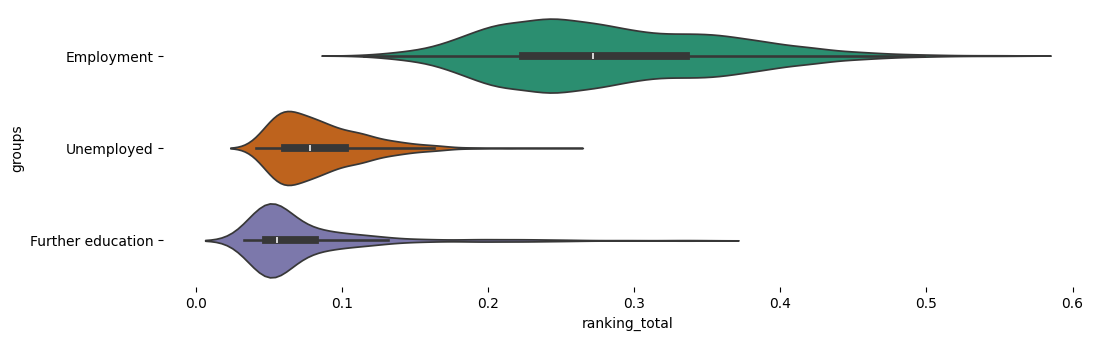

In [26]:
figsize = (12, 1.2 * len(SERank['groups'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(SERank, x='ranking_total', y='groups', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

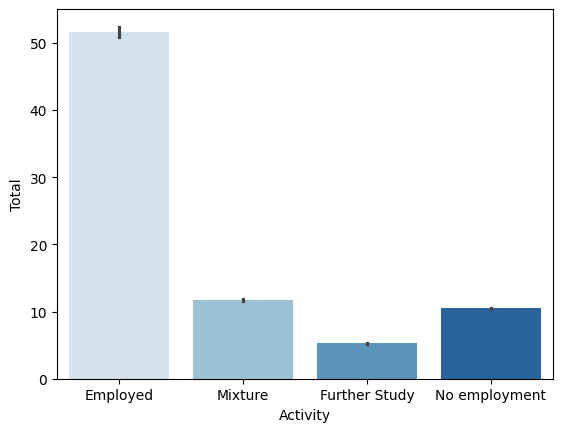

In [27]:
sns.barplot(x = "Activity", y = "Total", data = GradData, palette = "Blues")
plt.show()

In [28]:
top5rn = SERank.sort_values(by=['rank']).head(5)
bottom5rn = SERank.sort_values(by=['rank']).tail(5)

print(top5rn)
print(bottom5rn)

            ConstituencyName             RegNationName             groups  \
3041        Nottingham South             East Midlands  Further education   
172                Battersea                    London         Employment   
171                Battersea                    London         Employment   
304   Birmingham, Hodge Hill             West Midlands         Unemployed   
1678           Great Grimsby  Yorkshire and The Humber         Employment   

      ranking_total  rank  
3041       0.345145     1  
172        0.556306     1  
171        0.556306     1  
304        0.247469     1  
1678       0.458726     1  
            ConstituencyName    RegNationName             groups  \
3300           Richmond Park           London         Employment   
224       Berwick-upon-Tweed       North East  Further education   
2833    North East Hampshire       South East         Unemployed   
297   Birmingham, Hodge Hill    West Midlands         Employment   
785                Cambridge 

In [29]:
top5rt = SERank.sort_values(by=['ranking_total']).tail(5)
bottom5rt = SERank.sort_values(by=['ranking_total']).head(5)

print(top5rt)
print(bottom5rt)

     ConstituencyName RegNationName      groups  ranking_total  rank
4590        Wimbledon        London  Employment       0.542545     3
3295    Richmond Park        London  Employment       0.551775     2
3294    Richmond Park        London  Employment       0.551775     2
172         Battersea        London  Employment       0.556306     1
171         Battersea        London  Employment       0.556306     1
          ConstituencyName    RegNationName             groups  ranking_total  \
224     Berwick-upon-Tweed       North East  Further education       0.032813   
2870         North Norfolk  East of England  Further education       0.033315   
1016               Clacton  East of England  Further education       0.035385   
2420  Louth and Horncastle    East Midlands  Further education       0.036881   
2969    North West Norfolk  East of England  Further education       0.037842   

      rank  
224    573  
2870   572  
1016   571  
2420   570  
2969   569  


In [30]:
AreaQuali['2022 local authorities: county'].unique()

array(['Darlington', 'County Durham', 'Hartlepool', 'Middlesbrough',
       'Northumberland', 'Redcar and Cleveland', 'Stockton-on-Tees',
       'Gateshead', 'Newcastle upon Tyne', 'North Tyneside',
       'South Tyneside', 'Sunderland', 'Blackburn with Darwen',
       'Blackpool', 'Cheshire East', 'Cheshire West and Chester',
       'Halton', 'Warrington', 'Cumbria', 'Bolton', 'Bury', 'Manchester',
       'Oldham', 'Rochdale', 'Salford', 'Stockport', 'Tameside',
       'Trafford', 'Wigan', 'Lancashire', 'Knowsley', 'Liverpool',
       'Sefton', 'St. Helens', 'Wirral', 'East Riding of Yorkshire',
       'Kingston upon Hull, City of', 'North East Lincolnshire',
       'North Lincolnshire', 'York', 'North Yorkshire', 'Barnsley',
       'Doncaster', 'Rotherham', 'Sheffield', 'Bradford', 'Calderdale',
       'Kirklees', 'Leeds', 'Wakefield', 'Derby', 'Leicester',
       'Nottingham', 'Rutland', 'Derbyshire', 'Leicestershire',
       'Lincolnshire', 'Nottinghamshire', 'North Northamptonshir

In [31]:
Nott = AreaQuali[AreaQuali['2022 local authorities: county'] == 'Nottinghamshire']
Mert = AreaQuali[AreaQuali['2022 local authorities: county'] == 'Merton']
Brum = AreaQuali[AreaQuali['2022 local authorities: county'] == 'Birmingham']
NELinc = AreaQuali[AreaQuali['2022 local authorities: county'] == 'North East Lincolnshire']

Top5rn = pd.concat([Nott, Mert, Brum, NELinc], ignore_index=True)
Top5rn

,2022 local authorities: county,Qualification Type,Total
0,Nottinghamshire,No qualifications,32562
1,Nottinghamshire,Other qualifications,36725
2,Nottinghamshire,Other qualifications,54099
3,Nottinghamshire,Apprenticeship,21070
4,Nottinghamshire,Other qualifications,82962
5,Nottinghamshire,Level 4 qualifications or above,144056
6,Nottinghamshire,Other qualifications,6788
7,Merton,No qualifications,8956
8,Merton,Other qualifications,6526
9,Merton,Other qualifications,7942


In [32]:
Rich = AreaQuali[AreaQuali['2022 local authorities: county'] == 'Richmond upon Thames']
Nland = AreaQuali[AreaQuali['2022 local authorities: county'] == 'Northumberland']
NNshire = AreaQuali[AreaQuali['2022 local authorities: county'] == 'North Northamptonshire']
Brum = AreaQuali[AreaQuali['2022 local authorities: county'] == 'Birmingham']
Camb = AreaQuali[AreaQuali['2022 local authorities: county'] == 'Cambridgeshire']

Bottom5rn = pd.concat([Rich, Nland, NNshire, Brum, Camb], ignore_index=True)
Bottom5rn

,2022 local authorities: county,Qualification Type,Total
0,Richmond upon Thames,No qualifications,3751
1,Richmond upon Thames,Other qualifications,3523
2,Richmond upon Thames,Other qualifications,5500
3,Richmond upon Thames,Apprenticeship,1804
4,Richmond upon Thames,Other qualifications,10829
5,Richmond upon Thames,Level 4 qualifications or above,68908
6,Richmond upon Thames,Other qualifications,1409
7,Northumberland,No qualifications,9939
8,Northumberland,Other qualifications,12398
9,Northumberland,Other qualifications,20706


In [33]:
Mert = AreaQuali[AreaQuali['2022 local authorities: county'] == 'Merton']
Rich = AreaQuali[AreaQuali['2022 local authorities: county'] == 'Richmond upon Thames']
Wand = AreaQuali[AreaQuali['2022 local authorities: county'] == 'Wandsworth']

Top5rt = pd.concat([Mert, Rich, Wand], ignore_index=True)
Top5rt

,2022 local authorities: county,Qualification Type,Total
0,Merton,No qualifications,8956
1,Merton,Other qualifications,6526
2,Merton,Other qualifications,7942
3,Merton,Apprenticeship,3309
4,Merton,Other qualifications,13453
5,Merton,Level 4 qualifications or above,66101
6,Merton,Other qualifications,2925
7,Richmond upon Thames,No qualifications,3751
8,Richmond upon Thames,Other qualifications,3523
9,Richmond upon Thames,Other qualifications,5500


In [34]:
Nland = AreaQuali[AreaQuali['2022 local authorities: county'] == 'Northumberland']
Norf = AreaQuali[AreaQuali['2022 local authorities: county'] == 'Norfolk']
Ess = AreaQuali[AreaQuali['2022 local authorities: county'] == 'Essex']
Linc = AreaQuali[AreaQuali['2022 local authorities: county'] == 'Lincolnshire']

Bottom5rt = pd.concat([Nland, Norf, Ess, Linc], ignore_index=True)
Bottom5rt

,2022 local authorities: county,Qualification Type,Total
0,Northumberland,No qualifications,9939
1,Northumberland,Other qualifications,12398
2,Northumberland,Other qualifications,20706
3,Northumberland,Apprenticeship,8349
4,Northumberland,Other qualifications,32548
5,Northumberland,Level 4 qualifications or above,52321
6,Northumberland,Other qualifications,1906
7,Norfolk,No qualifications,39678
8,Norfolk,Other qualifications,44773
9,Norfolk,Other qualifications,63952


([0, 1, 2, 3],
 [Text(0, 0, 'Nottinghamshire'),
  Text(1, 0, 'Merton'),
  Text(2, 0, 'Birmingham'),
  Text(3, 0, 'North East Lincolnshire')])

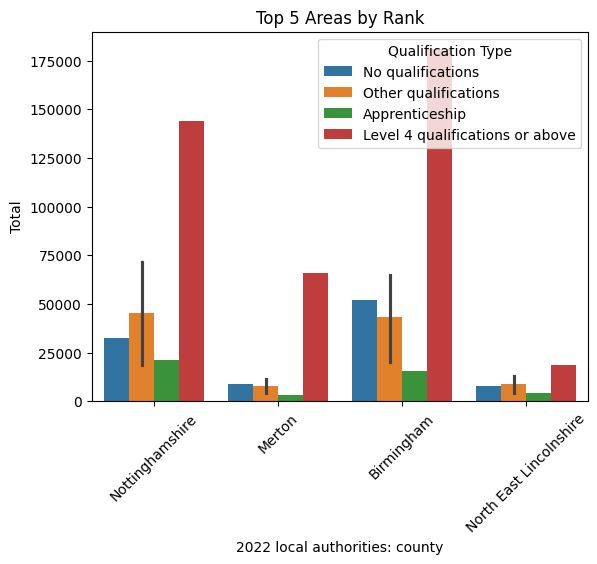

In [35]:
sns.barplot(data=Top5rn, x='2022 local authorities: county', y='Total', hue='Qualification Type').set(title='Top 5 Areas by Rank')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Richmond upon Thames'),
  Text(1, 0, 'Northumberland'),
  Text(2, 0, 'North Northamptonshire'),
  Text(3, 0, 'Birmingham'),
  Text(4, 0, 'Cambridgeshire')])

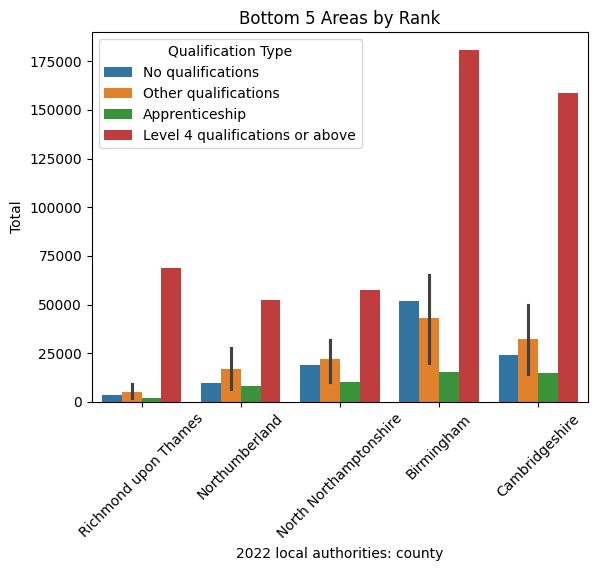

In [36]:
sns.barplot(data=Bottom5rn, x='2022 local authorities: county', y='Total', hue='Qualification Type').set(title='Bottom 5 Areas by Rank')
plt.xticks(rotation=45)

([0, 1, 2],
 [Text(0, 0, 'Merton'),
  Text(1, 0, 'Richmond upon Thames'),
  Text(2, 0, 'Wandsworth')])

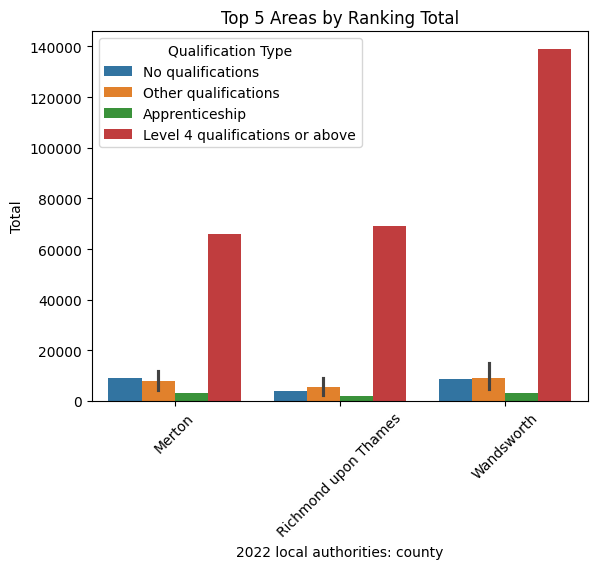

In [37]:
sns.barplot(data=Top5rt, x='2022 local authorities: county', y='Total', hue='Qualification Type').set(title='Top 5 Areas by Ranking Total')
plt.xticks(rotation=45)

([0, 1, 2, 3],
 [Text(0, 0, 'Northumberland'),
  Text(1, 0, 'Norfolk'),
  Text(2, 0, 'Essex'),
  Text(3, 0, 'Lincolnshire')])

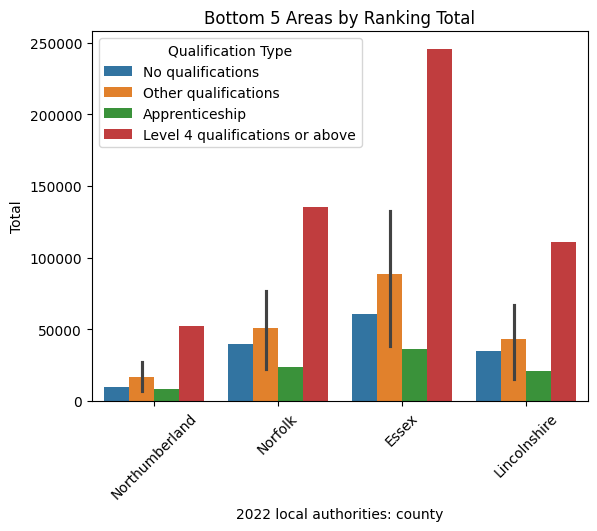

In [38]:
sns.barplot(data=Bottom5rt, x='2022 local authorities: county', y='Total', hue='Qualification Type').set(title='Bottom 5 Areas by Ranking Total')
plt.xticks(rotation=45)

In [39]:
Activity_mapping = {"Employed": 4, "Further Study": 3, "Mixture": 2, "No employment": 1}
GradData['Activity'] = GradData['Activity'].map(Activity_mapping)

MoFS_mapping = {"Full-time": 3, "Part-time": 2, "All": 1}
GradData['Mode of former study'] = GradData['Mode of former study'].map(MoFS_mapping)

LoQO_mapping = {"Postgraduate": 3, "Undergradute": 2, "All": 1}
GradData['Level of qualification obtained'] = GradData['Level of qualification obtained'].map(LoQO_mapping)

In [40]:
GradData = GradData.drop(['Provider name'], axis = 1)

In [41]:
from sklearn.model_selection import train_test_split

predictors = GradData.drop(['Level of qualification obtained', 'Activity'], axis = 1)
target = GradData["Total"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.5, random_state = 0)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()                              #Store The Model In My Own Variable
logreg.fit(x_train, y_train)                               #Train The Model With The Training Data
y_pred = logreg.predict(x_val)                             #Predict The Values Of The Validation Data
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2) #Compare The Predicted Values With The True Value To Get The Accuracy
print(acc_logreg)

70.48


In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier()                          #Store The Model In My Own Variable
dt.fit(x_train, y_train)                               #Train The Model With The Training Data
y_pred = dt.predict(x_val)                             #Predict The Values Of The Validation Data
acc_dt = round(accuracy_score(y_pred, y_val) * 100, 2) #Compare The Predicted Values With The True Value To Get The Accuracy
print(acc_dt)

99.98


In [44]:
from sklearn.ensemble import RandomForestClassifier

randf = RandomForestClassifier()                          #Store The Model In My Own Variable
randf.fit(x_train, y_train)                               #Train The Model With The Training Data
y_pred = randf.predict(x_val)                             #Predict The Values Of The Validation Data
acc_randf = round(accuracy_score(y_pred, y_val) * 100, 2) #Compare The Predicted Values With The True Value To Get The Accuracy
print(acc_randf)

99.95


In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()                            #Store The Model In My Own Variable
knn.fit(x_train, y_train)                               #Train The Model With The Training Data
y_pred = knn.predict(x_val)                             #Predict The Values Of The Validation Data
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)  #Compare The Predicted Values With The True Value To Get The Accuracy
print(acc_knn)

99.94


In [46]:
models = pd.DataFrame({
    'Model': ['Logistical Regression', 'Decission Tree', 'Randon Forest', 'KNN'],
    'Score': [acc_logreg, acc_dt, acc_randf, acc_knn]})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,Decission Tree,99.98
2,Randon Forest,99.95
3,KNN,99.94
0,Logistical Regression,70.48
